In [1]:
#    _____                                             ____  
#   |_   _|  __ _      _ _    ___    __ _      o O O  |__ /  
#     | |   / _` |    | '_|  / -_)  / _` |    o        |_ \  
#    _|_|_  \__,_|   _|_|_   \___|  \__,_|   TS__[O]  |___/  
#  _|"""""|_|"""""|_|"""""|_|"""""|_|"""""| {======|_|"""""| 
#  "`-0-0-'"`-0-0-'"`-0-0-'"`-0-0-'"`-0-0-'./o--000'"`-0-0-' 
#  

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import sympy as sym 
import random as rand
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import integrate
from scipy.integrate import odeint

### Punto 1

Considerando una función multivaluada y que tiene un comportamiento diferenciable y suave en todo su dominio. Utilizamos la expansión de Taylor de orden 2, 

$$F(x,y) \approx F(x+h, y+h) +(x+h)\frac{\partial f(x+h,y+h)}{\partial x}+(y+h)\frac{\partial f(x+h,y+h)}{\partial y}$$

Teniendo en cuenta nuestra ecuación diferencial $\dot{p}=g(q,p)$ y $\dot{q}=f(q,p)$, podemos expresarla por Taylor con un punto fijo,

$$\dot{p}\approx g(q_0,p_0)+q\frac{\partial g(q_0,p_0)}{\partial q}+p\frac{\partial g(q_0,p_0)}{\partial p}$$
$$\dot{q}\approx f(q_0,p_0)+q\frac{\partial f(q_0,p_0)}{\partial q}+p\frac{\partial f(q_0,p_0)}{\partial p}$$

Considerando que $g(q_0,p_0)=0$ y $f(q_0,p_0)=0$, podemos escribir de la siguiente manera el sistema, 

$$\begin{bmatrix} \dot{q} \\ \dot{p} \end{bmatrix} = \frac{d}{dt} \begin{bmatrix} q \\ p \end{bmatrix} = \begin{bmatrix}
  \frac{\partial f(q_0,p_0)}{\partial q} & \frac{\partial f(q_0,p_0)}{\partial p} \\
  \frac{\partial g(q_0,p_0)}{\partial q} & \frac{\partial g(q_0,p_0)}{\partial p} \\
\end{bmatrix} \begin{bmatrix} q \\ p \end{bmatrix}
$$

a) y b)

In [3]:
def System(r,t):
    x,y = r
    
    dx=2*x-y
    dy=x+2*y
    
    return np.array([dx,dy])

In [4]:
def RK4(f, r_0, t):
    
    h = t[1] - t[0]
    
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    
    
    x[0]= r_0[0]
    y[0] = r_0[1]
    
    for i in range(0, len(t)-1):
        r1 = np.array([x[i], y[i]])
        k1 = f(r1, t[i])
        
        r2 = np.array([x[i] + 0.5*h*k1[0], y[i] + 0.5*h*k1[1]])
        k2 = f(r2, 0.5*h + t[i])
        
        r3 = np.array([x[i] + 0.5*h*k2[0], y[i] + 0.5*h*k2[1]])
        k3 = f(r3, 0.5*h + t[i])
        
        r4 = np.array([x[i] + h*k3[0], y[i] + h*k3[1]])
        k4 = f(r4, h + t[i])
        
        x[i+1] = x[i] + (h/6) * (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])
        y[i+1] = y[i] + (h/6) * (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])
        
    return x, y

<IPython.core.display.Javascript object>


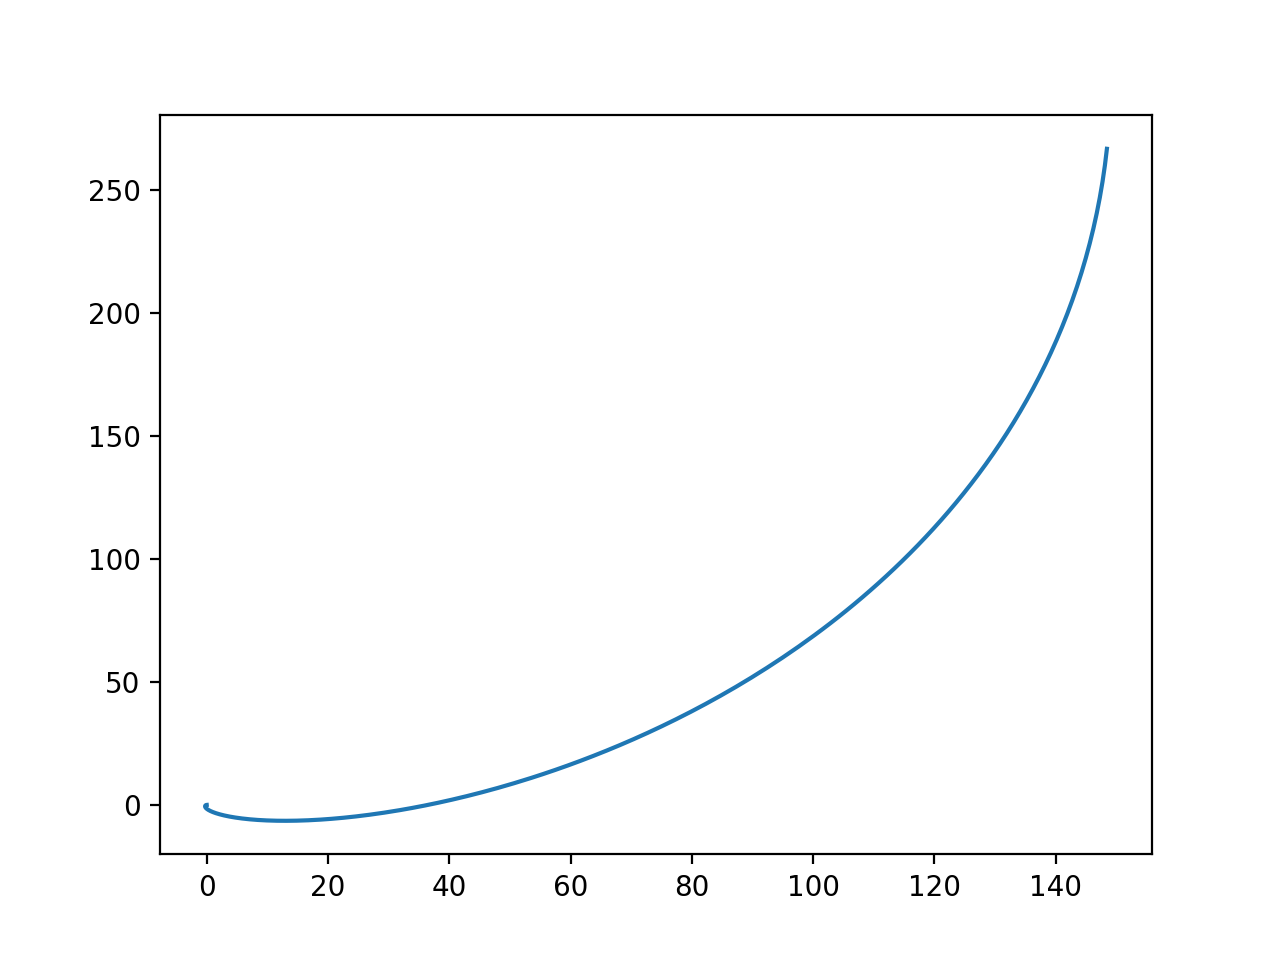

In [6]:
t = np.arange(0, 5, 0.01)

h = t[1] - t[0]
r_0 = [0.-h,0.+h]
x,y = RK4(System, r_0, t)

plt.plot(x, y)


c)

In [7]:
M = np.array([[2,-1],[1,2]])
valores = np.linalg.eig(M)
print("Valores Propios:", valores[0])
print("Vectores propios:", valores[1][0], " , ",valores[1][1])

Valores Propios: [2.+1.j 2.-1.j]
Vectores propios: [0.70710678+0.j 0.70710678-0.j]  ,  [0.-0.70710678j 0.+0.70710678j]


d)

<IPython.core.display.Javascript object>


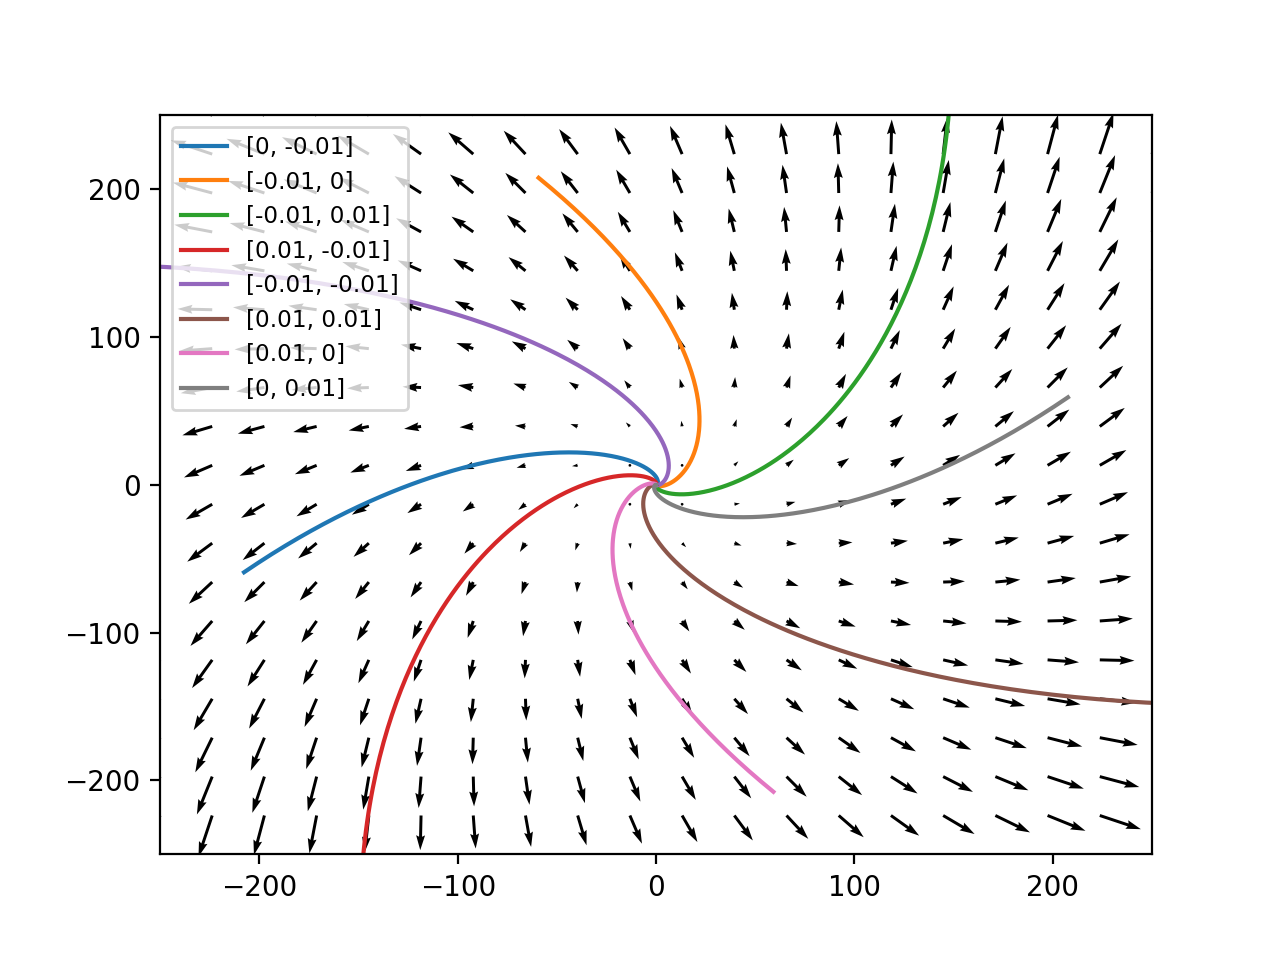

(-250.0, 250.0)

In [8]:
t = np.arange(0, 5, 0.01)

fig=plt.figure()
ax=fig.add_subplot()

r_0=[[0,0-h],[0-h,0], [0-h,0+h],[0+h,0-h],[0-h,0-h],[0+h,0+h],[0+h,0],[0,0+h]]


for i in r_0:
    res=RK4(System,i,t)
    ax.plot(res[0],res[1], label = str(i))
    plt.legend(fontsize='small')
    


xa,ya = np.meshgrid(np.linspace(-250,250,20),np.linspace(-250,250,20))    
ax.quiver(xa,ya,System([xa,ya],t)[0],System([xa,ya],t)[1])

plt.xlim(-250, 250)
plt.ylim(-250, 250)


El punto crítico es (0,0)

### Punto 3

a)

b)

c)

d)

e)

In [2]:
t=np.linspace(0,8,10000)

d=0.3
g=9.81
m=0.1
r=0.1
d_psi=400
theta0 = np.pi*0.25
r_0=[0.,0.,theta0,0.]

I_z = 0.5*m*r**2
I_0=0.25*m*r**2+m*d**2
pphi = I_z*d_psi*np.cos(theta0)

In [3]:

def System(r_0,t):
    
    phi, psi, theta, dtheta = r_0
    
    dphi= (I_z*d_psi*(np.cos(theta0)-np.cos(theta)))/(I_0*np.sin(theta)**2+I_z*np.cos(theta)**2)
    
    val1 = dphi**2*np.sin(theta)*np.cos(theta)*(I_0-I_z)
    val2 = dphi*d_psi*I_z*np.sin(theta)
    val3 = m*g*d*np.sin(theta)
    d2theta= (val1-val2+val3)/I_0
    
    return [d_psi,dphi,dtheta,d2theta]

In [4]:
sol=odeint(System,r_0,t)
dpsi=sol[:,0]
dphi=sol[:,1]
dtheta=sol[:,2]
d2theta=sol[:,3]


<IPython.core.display.Javascript object>


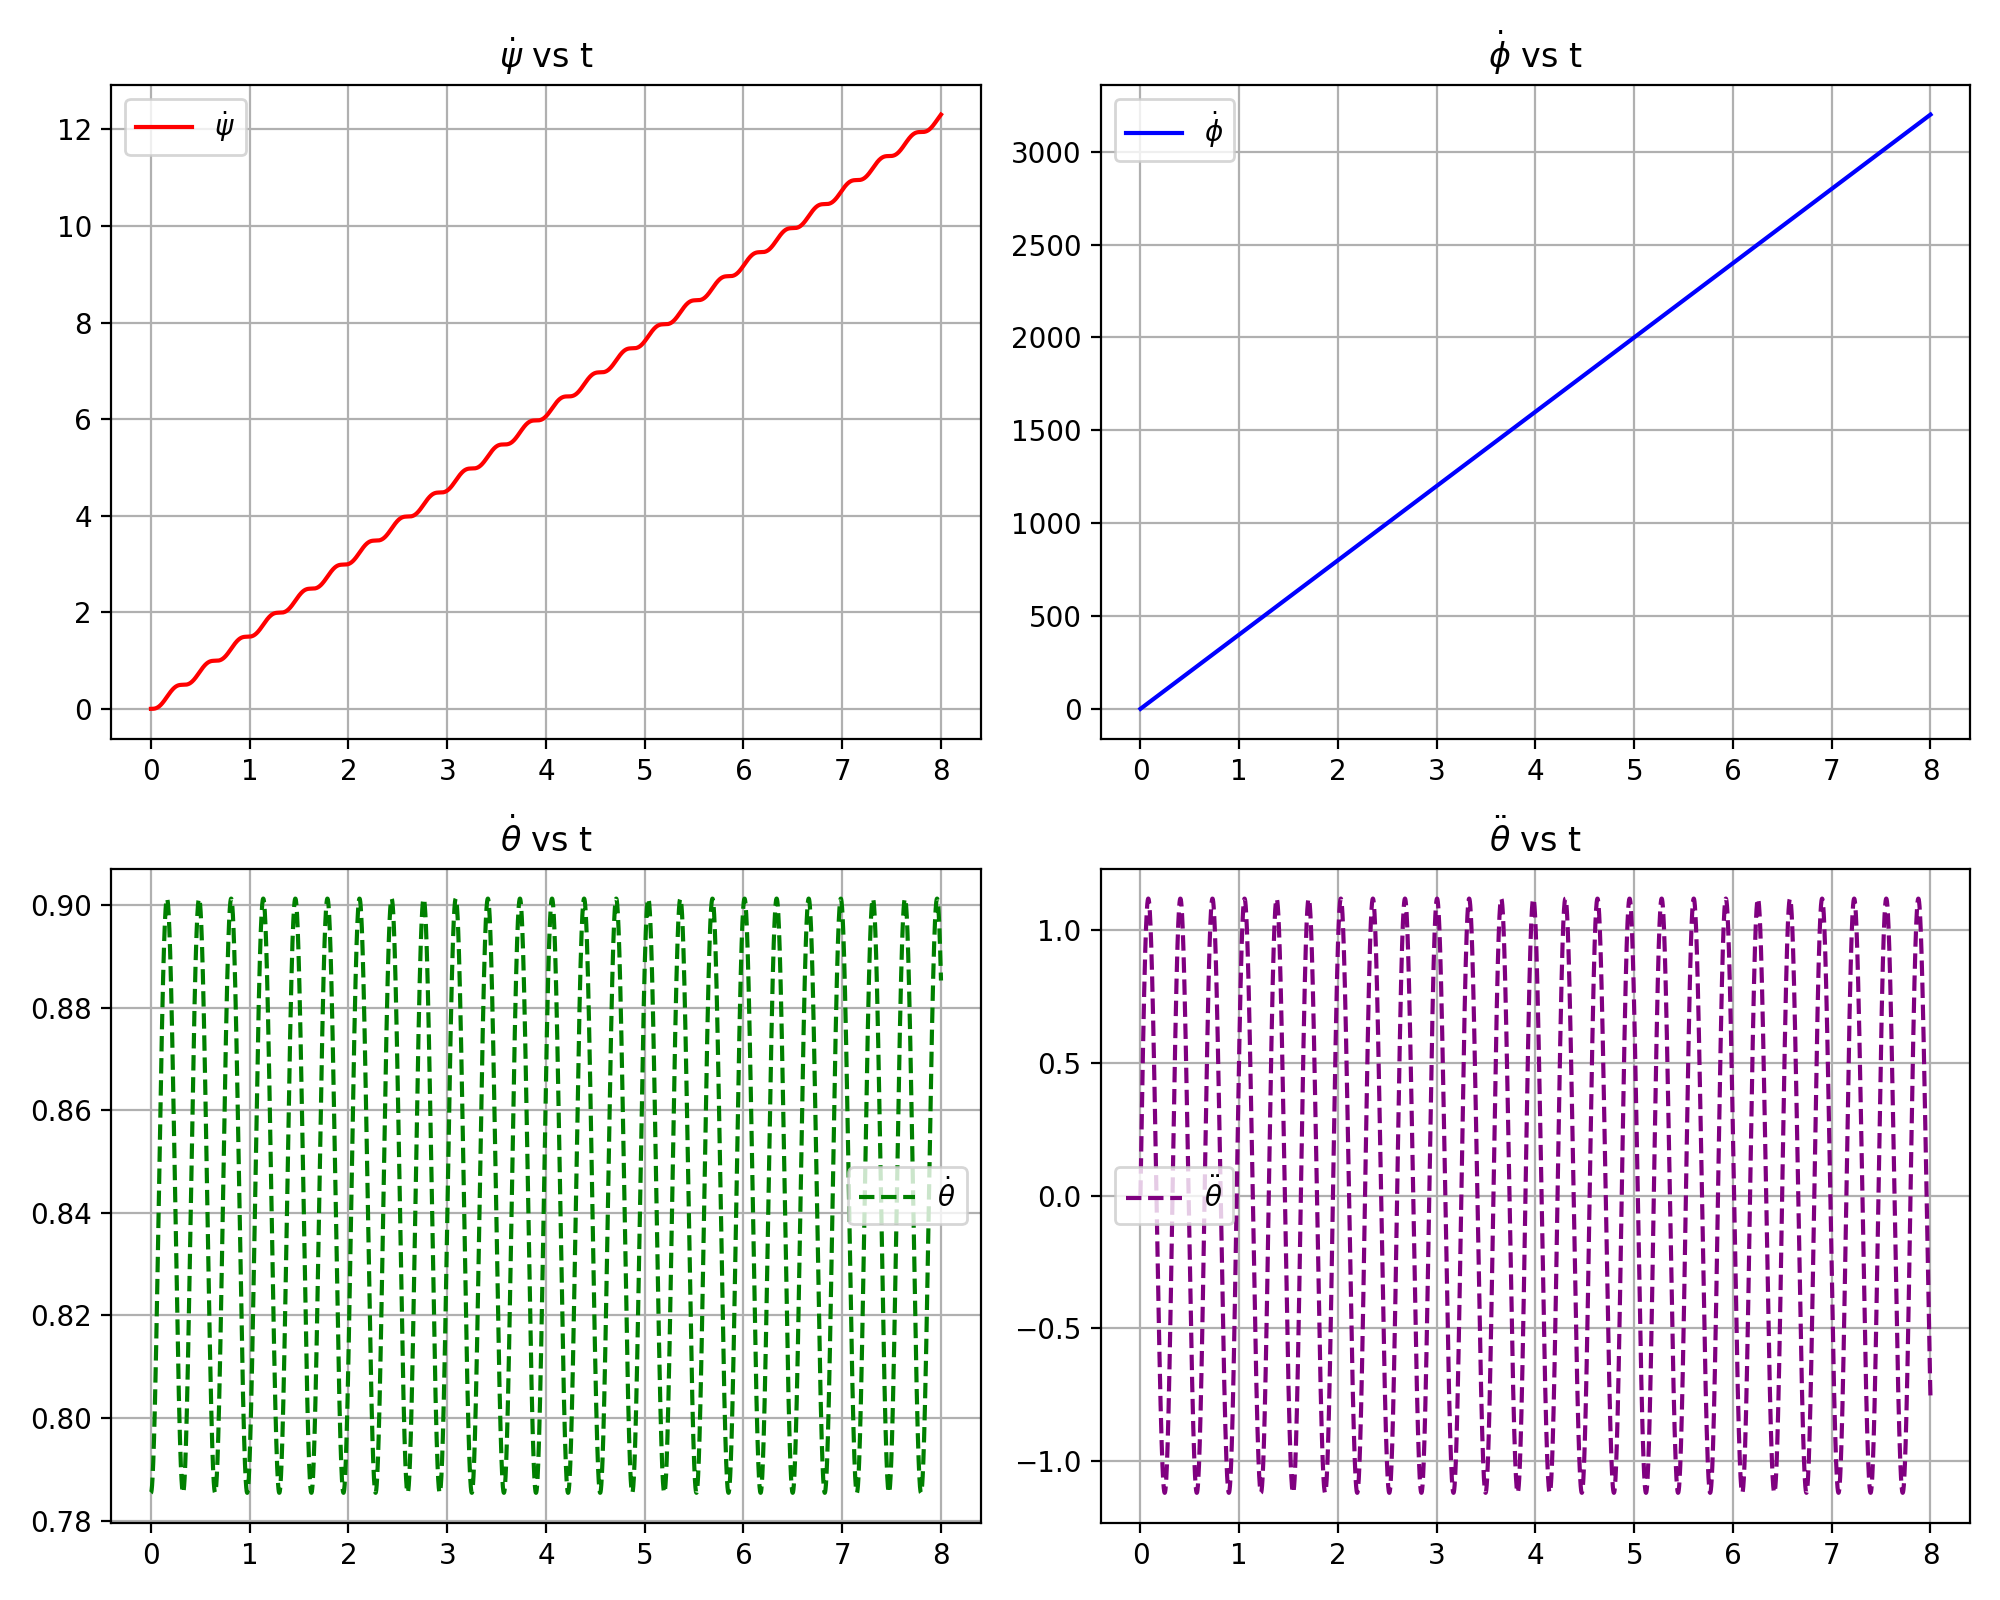

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Gráfica 1
axs[0, 0].plot(t, dphi, color="red", label='$\dot \psi$')
axs[0, 0].set_title('$\dot \psi$ vs t')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Gráfica 2
axs[0, 1].plot(t,dpsi , color="blue", label='$\dot \phi$')
axs[0, 1].set_title('$\dot \phi$ vs t')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Gráfica 3
axs[1, 0].plot(t, dtheta, color="green", linestyle='--', label='$\dot θ$')
axs[1, 0].set_title('$\dot θ $ vs t')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Gráfica 4
axs[1, 1].plot(t, d2theta, color="purple", linestyle='--', label='$\ddot θ $')
axs[1, 1].set_title('$\ddot θ$ vs t')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Ajustar el espaciado entre subplots
plt.tight_layout()

f)

<IPython.core.display.Javascript object>


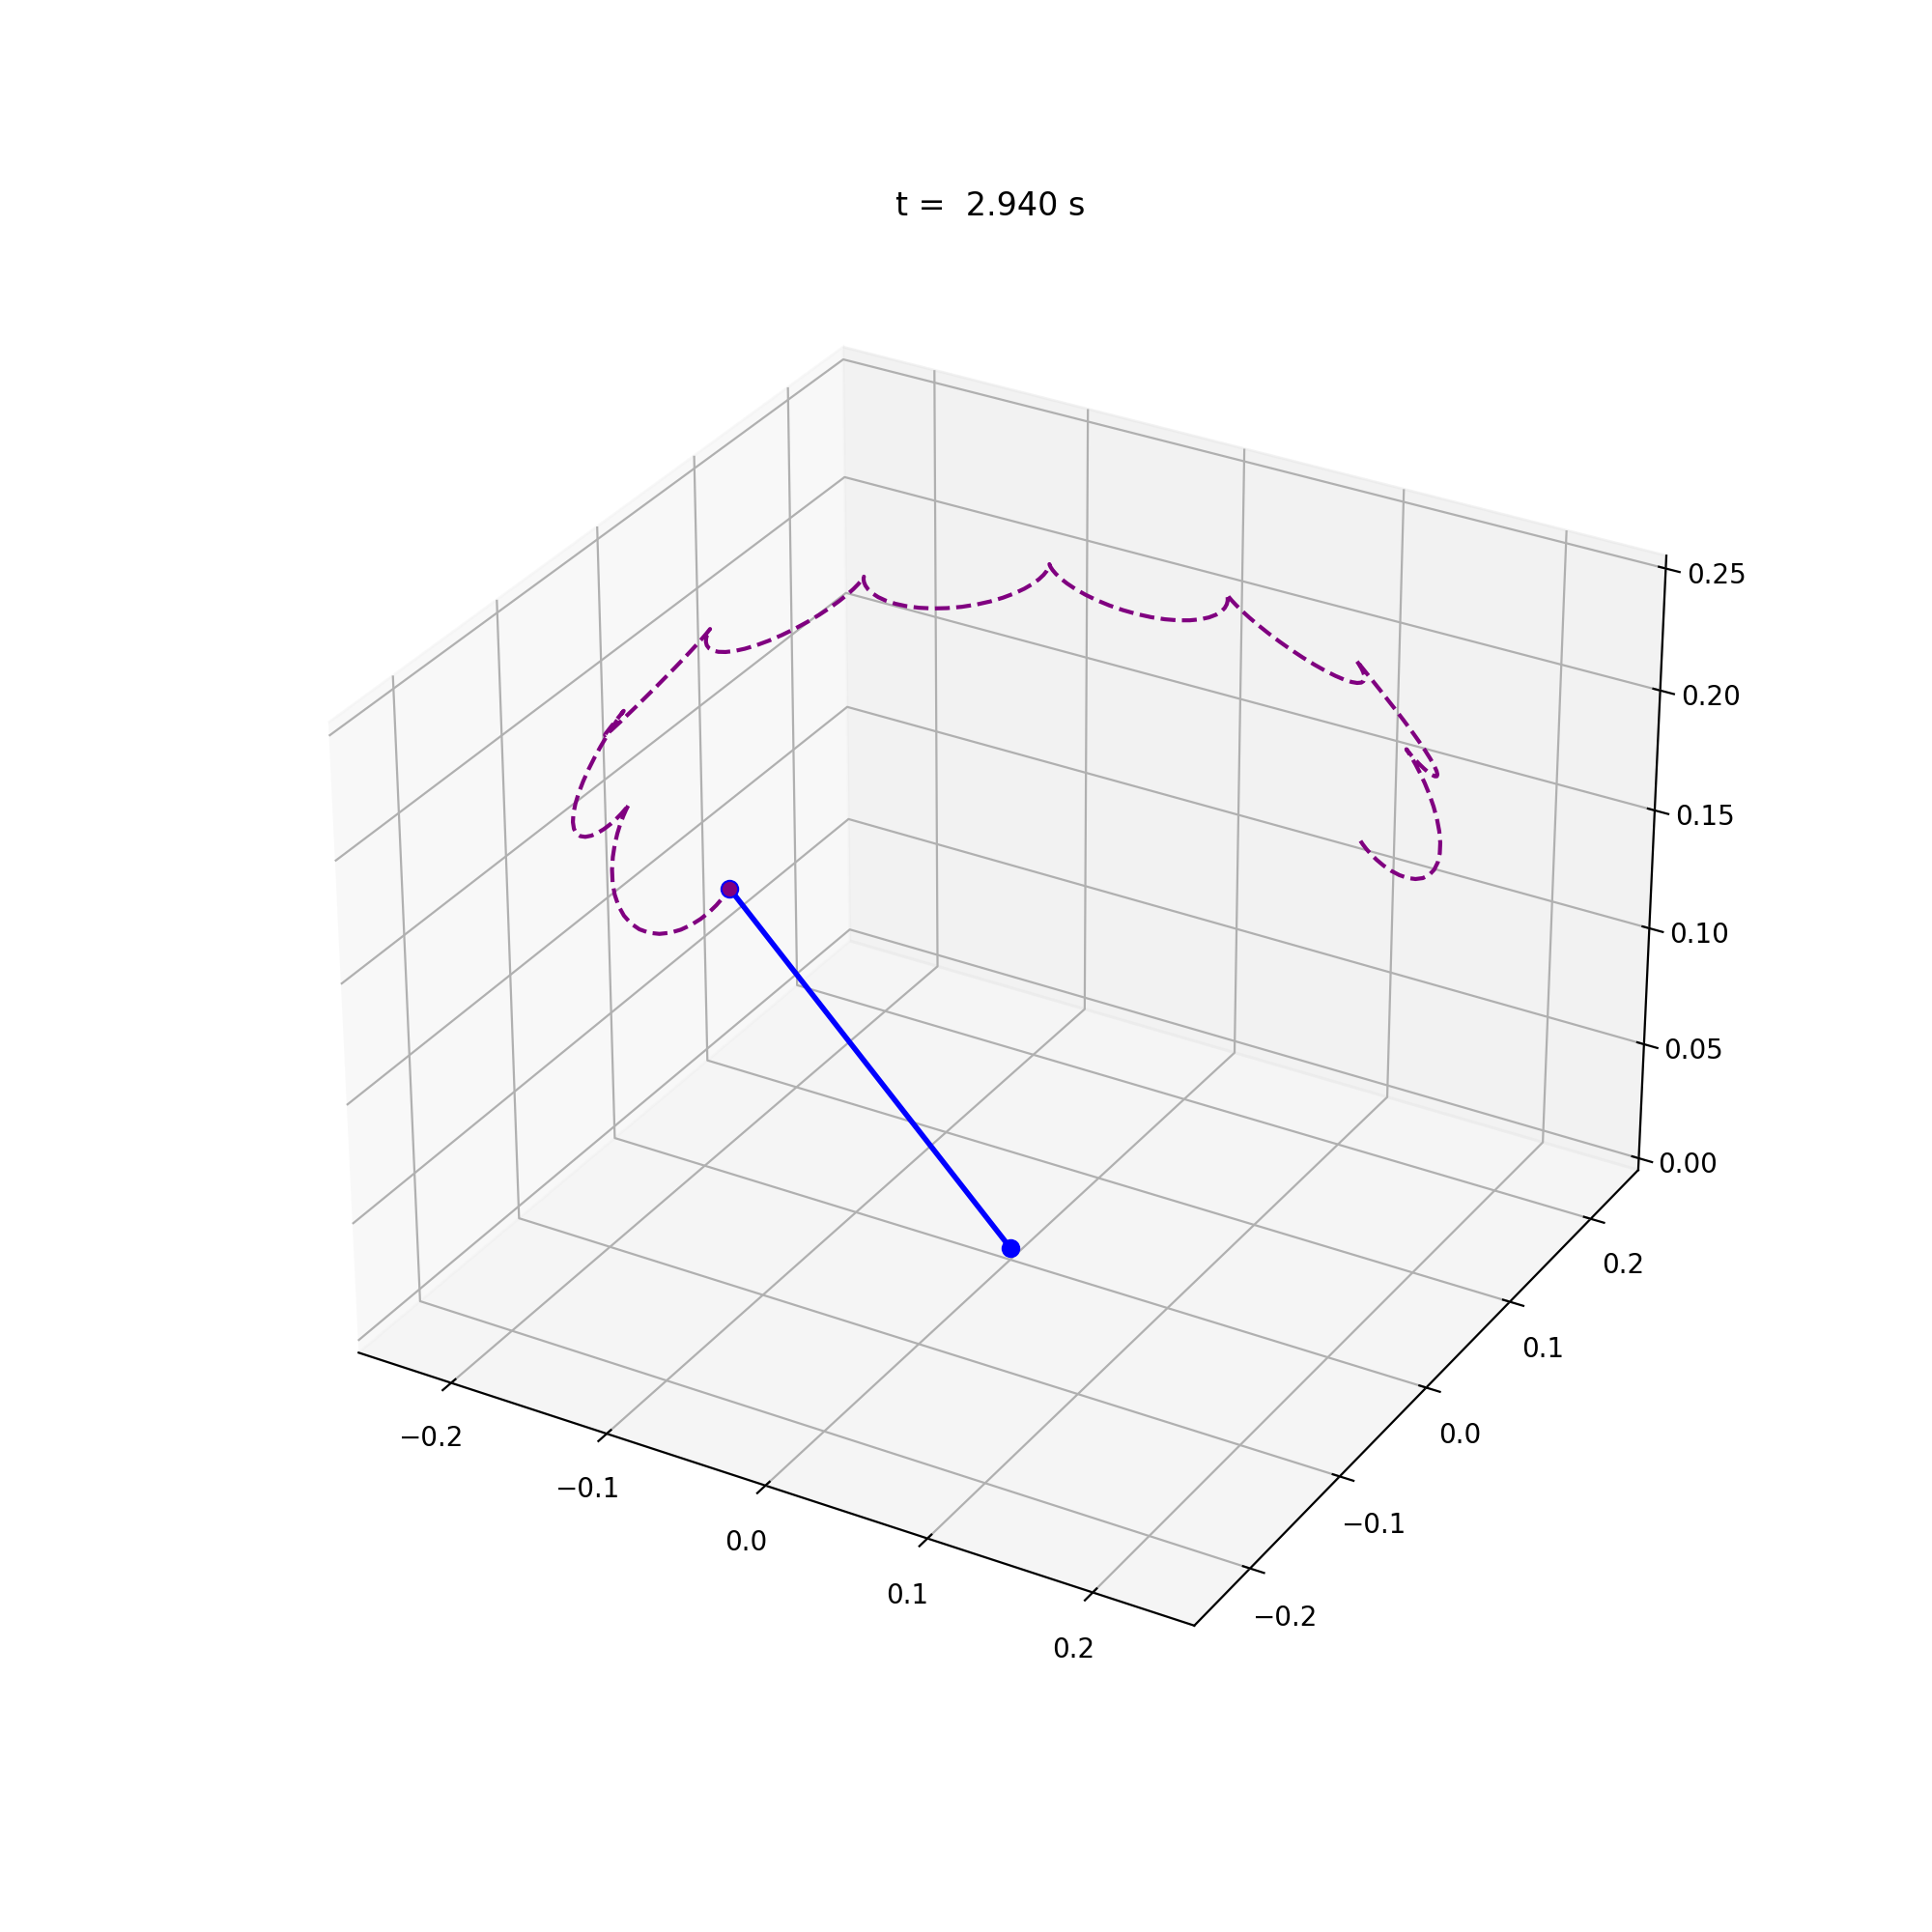

In [24]:
x_=np.zeros_like(t)
y_=np.zeros_like(t)
z_=np.zeros_like(t)

for i in range(len(t)):
    x_[i]=d*np.cos(dphi[i])*np.sin(dtheta[i])
    y_[i]=d*np.sin(dphi[i])*np.sin(dtheta[i])
    z_[i]=d*np.cos(dtheta[i])  
    
scale = 15
t1 = t[::scale]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

def Update(i):
    
    ax.clear()
    ax.set_xlim(-0.25,0.25)
    ax.set_ylim(-0.25,0.25)
    ax.set_zlim(0,0.25)
    ax.set_title(r't =  %.3f s' %(t1[i]))
        
    x=x_[::scale][i]
    y=y_[::scale][i]
    z=z_[::scale][i]
    
    val_1 =x_[::scale][:i]
    val_2 =y_[::scale][:i]
    val_3 = z_[::scale][:i]
    
    ax.plot(val_1,val_2,val_3,color="purple", linestyle='--')    
    ax.scatter(x,y,z,c="purple")
    ax.plot([0,x], [0,y],[0,z], 'o-', lw=2,c="blue")
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t1))

g)

In [27]:
vprec=(dphi[-1]-dphi[0])/(t1[-1]-t1[0])

print("La velocidad de precesión del sistema es ", vprec )

La velocidad de precesión del sistema es  1.5414386511016505


### Punto 4

c)

La posición de la nave y de la luna con respecto al marco de referencia (la tierra) es respectivamente:

$\vec{r_N} (t) = \langle r(t) cos(\phi (t)), r(t) sin(\phi (t)) \rangle$

$\vec{r_L} (t) = \langle d cos( \omega t), d sin(\omega t) \rangle$

El vector de separación es, entonces la resta entre las posiciones de la luna y la nave:

$\vec{r_{LN}} (t) = \vec{r_L} (t) - \vec{r_N} (t)$

$\vec{r_{LN}} (t) = \langle d cos(\omega t) - r(t) cos(\phi (t)), d sin (\omega t) - r(t) sin(\phi (t)) \rangle$

Por lo tanto, la distancia será la norma del vector separación, tal que:

$r_{LN} = |\vec{r_{LN} (t)}|$

$r_{LN} = \sqrt{(d cos(\omega t) - r(t) cos(\phi (t)))^2 + (d sin (\omega t) - r(t) sin(\phi (t)))^2}$

$r_{LN} = \sqrt{d^2 cos^2(\omega t) - 2d r(t) cos (\omega t) cos(\phi (t)) cos(\phi (t)) + r^2 (t) cos^2 (\phi (t)) + d^2 sin^2(\omega t) - 2d r(t) sin(\omega t) sin(\phi (t)) + r^2 (t) sin^2 (\phi (t))}$

$r_{LN} = \sqrt{d^2 + r^2(t) - 2d r(t) cos(\omega t) cos(\phi (t)) + sin(\omega t) sin(\phi (t))}$

Usando la identidad trigonométrica $cos(A \pm B) = cos(A) cos(B) \mp sin(A) sin(B)$

$r_{LN} (r, \phi, t) = \sqrt{r^2(t) + d^2 - 2r(t) d cos(\phi - \omega t)}$




d)

En primer lugar, es necesario hallar el Lagrangiano del sistema, el cual está definido como 

$\mathcal{L} (q_i, \dot{q}_i, t) = T - V$

Donde $q_i$ son las coordenadas generalizadas del sistema (En este caso $r$ y $\phi$), \dot{q}_i las velociades generalizadas y $T$ es la energía cinética y $V$ la energía potencial). 

La energía cinética se obtiene como:

$T = \frac{1}{2} m \dot{r}_{TN}^2 (t) = \frac{1}{2} m (\dot{r}^2(t) + r^2(t) \dot{\phi}^2 (t))$

Por otra parte, la energía potencial no será otra que la potencial gravitacional que sentirá la nave tanto por la tierra como por la luna.

$V = -Gm \left ( \frac{m_T}{r(t)} + \frac{m_L}{r_{LN}} \right )$

De esta forma, el Lagrangiano queda:

$\mathcal{L} =  \frac{1}{2} m (\dot{r}^2(t) + r^2(t) \dot{\phi}^2 (t)) + G \frac{mm_T}{r(t)} + G \frac{mm_L}{r_{LN}}$

Ahora, el Hamiltoniano se obtiene mediante una transformada de Legendre aplicada sobre el Lagrangiano, tal que:

$\mathcal{H} (q_i, p_i, t) = p_i \dot{q}_i - \mathcal{L}$

En donde $p_i$ son los momentos generalizados de cada coordenada generalizada. Para el caso de este sistema, se obtienen de la siguiente forma:

$p_r = \frac{ \partial \mathcal{L}}{\partial \dot{r}} = m\dot{r} (t)$

$p_\phi = \frac{\partial \mathcal{L}}{\partial \dot{\phi}} = mr^2(t) \dot{\phi} (t)$

o bien:

$\dot{r}(t) = \frac{p_r}{m}$

$\dot{\phi} (t) = \frac{p_\phi}{m r^2(t)}$

Reemplazando en el Lagrangiano:

$\mathcal{L} = \frac{p_r^2}{2m} + \frac{p_{\phi}^2}{2mr^2(t)} + G \frac{mm_T}{r(t)} + G \frac{mm_L}{r_{LN}}$

Con lo cual, finalmente:

$\mathcal{H} = p_r \dot{r} + p_{\phi} \dot{\phi} - \mathcal{L}$

$\mathcal{H} = \frac{p_r^2}{2m} + \frac{p_\phi^2}{2mr^2} - G \frac{mm_T}{r} - G \frac{mm_L}{r_{LN}}$

e)

Para $\dot{r}$, el primer término del Hamiltoniano es el único que depende de $p_r$, por lo tanto:

$\dot{r} = \frac{\partial \mathcal{H}}{\partial p_r} = \frac{\partial}{\partial p_r} \left ( \frac{p_r^2}{2m} \right ) = \frac{p_r}{m}$


Para $\dot{\phi}$ el segundo término del Hamiltoniano es el único que depende de $p_\phi$, por lo tanto:

$\dot{\phi} = \frac{\partial \mathcal{H}}{\partial p_{\phi}} = \frac{\partial}{\partial p_\phi} \left ( \frac{p_\phi^2}{2mr^2} \right ) = \frac{p_\phi}{mr^2}$

Para $\dot{p}_r$, los tres ultimos términos dependen de $r$, por lo tanto es necesario expandir $r_{LN}$ para efectuar la derivada.

$\dot{p}_r = - \frac{\partial H}{\partial r} = - \frac{\partial}{\partial r} \left ( \frac{p_\phi^2}{2mr^2} - G \frac{mm_T}{r} - G \frac{mm_L}{\sqrt{r^2(t) + d^2 -2r(t)dcos(\phi - \omega t)}} \right )$

$\dot{p}_r = \frac{p_\phi^2}{mr^3} - G \frac{mm_T}{r^2} - G \frac{mm_L}{r_{LN}^3} (r - dcos(\phi - \omega t))$

Un procedimiento similar se debe realizar para $\dot{p}_\phi$, tal que:

$\dot{p_\phi} = - \frac{\partial \mathcal{H}}{\partial \phi} = \frac{\partial}{\partial \phi} \left (- G \frac{mm_L}{\sqrt{r^2(t) + d^2 -2r(t)dcos(\phi - \omega t)}} \right ) = - G \frac{mm_L}{r_L^3}rdsin(\phi - \omega t)$ 

f)

Para $\dot{\tilde{r}}$:

$\dot{\tilde{r}} = \frac{\dot{r}}{d} =  \frac{p_r}{md} = \tilde{p_r}$

Para $\dot{\phi}$: 

$\dot{\phi} = \frac{p_\phi}{mr^2} = \frac{p_\phi}{md^2\tilde{r}^2} = \frac{\tilde{p}_\phi}{\tilde{r}^2}$

Para $\dot{\tilde{p_r}}$:

$\dot{\tilde{p_r}} = \frac{\dot{p}_r}{md} = \frac{\frac{p_\phi^2}{mr^3} - G \frac{mm_T}{r^2} - G \frac{mm_L}{r_{LN}^3} (r - dcos(\phi - \omega t))}{md}$

$\dot{\tilde{p_r}} = \frac{p_\phi^2}{m^2r^3d} - G \frac{m_T}{r^2d} - G \frac{m_L}{r_{LN}^3 d} (r - dcos(\phi - \omega t)) $

$\dot{\tilde{p_r}} = \frac{\frac{p_\phi}{m^2d^4}}{\frac{r^3}{d^3}} - \frac{Gm_T d^2}{d^3r^2} - \frac{GM_T}{d^3} \left ( \frac{M_L / M_T }{(1 + r^2/d^2 - 2 r/d cos(\phi - \omega t))^{3/2}} \right ) \left (\frac{r}{d} - cos(\phi - \omega t ) \right)$

$\dot{\tilde{p_r}} = \frac{\tilde{p}_\phi^2}{\tilde{r}^3} - \Delta \left [ \frac{1}{\tilde{r}^2} + \frac{\mu}{\tilde{r}'^3} (\tilde{r} - cos(\phi - \omega t)) \right ]$

Para $\dot{\tilde{p}}_\phi$:

$\dot{\tilde{p}}_\phi = \frac{\dot{p}_\phi}{md^2} = \frac{- G \frac{mm_L}{r_L^3}rdsin(\phi - \omega t)}{md^2} = - G \frac{m_L}{d r_L^3}r sin(\phi - \omega t)$

$\dot{\tilde{p}}_\phi = - \Delta \frac{m_L/m_T d^2}{r_L^3} r sin(\phi - \omega t) = - \Delta \frac{\mu }{\tilde{r}'^3 d} r sin(\phi - \omega t)$

$\dot{\tilde{p}_\phi} = - \frac{\Delta \mu \tilde{r}}{\tilde{r}'^3} sin(\phi - \omega t)$

g)

En $t_0$, $\vec{v_0} = \langle \dot{x}_0, \dot{y}_0 \rangle = \langle v_0 cos(\theta), v_0 sin(\theta) \rangle $, teniendo en cuenta que que el momento se define como $p = mv$ entonces:

$\tilde{p}_r ^0 = \frac{p_r^0}{md} = \frac {v_0}{d} = \frac{1}{d} \frac{dr}{dt} = \frac{1}{d} \frac{d}{dt} \sqrt{x^2 + y^2} = \frac{x \dot{d} + y \dot{y}}{rd} = \frac{r cos(\phi) v_0 cos(\theta) + r sin(\phi) v_0 sen(\theta)}{rd} $

$\tilde{p}_r ^0 = \frac{v_0}{d} cos(\theta - \phi) = \tilde{v}_0 cos (\theta - \phi)$

Haciendo lo mismo para $p_\phi ^ 0$:

$\tilde{p}_\phi ^0 = \frac{p_\phi^0}{md} = \frac{mr^2 \dot{\phi}}{md^2} = \tilde{r}^2 \frac{d \phi}{dt} = \tilde{r}^2 \frac{d}{dt} arctan(x/y) = \tilde{r}^2 \frac{\dot{y} x - y \dot{x}}{r^2} = \tilde{r}^2 \frac{r cos(\phi) v_0 cos(\theta) + r sin(\phi) v_0 sen(\theta)}{r^2} $

$\tilde{p}_\phi ^ 0 = \frac{\tilde{r}^2 v_0}{r} sin(\theta - \phi) = \tilde{r}_0 \tilde{v}_0 sin(\theta - \phi)$

In [88]:
G = 6.67e-11
mt = 5.98e24
rt= 6.38e6
ml = 0.073e24
rl = 1.74e6
d = 3.84e8
w = 2.66e-6

r0 = rt/d
v0 = 11110/d #Tomando la velocidad de escape como 11110 m/s

phi0 = np.pi/4
theta0 = np.pi/4 #Angulo de escape para alcanzar la parte oscura de la luna

pr0 = v0*np.cos(theta0 - phi0)
pphi0 = r0*v0*np.sin(theta0-phi0)

def system(rini,t):
    r, phi, pr, pphi = rini

    delta = G*mt/d**3
    mu = ml/mt
    rpri = np.sqrt(1 + r**2 - 2*r*np.cos(phi - w*t))

    drdt = pr
    dphidt = pphi/(r**2)
    dprdt = (pphi**2)/(r**3) - delta*(1/(r**2) + ((mu)/(rpri**3)) * (r - np.cos(phi - w*t)))
    dpphidt = - ((delta*mu*r)/(rpri**3)) * np.sin(phi -w*t)

    return np.array([drdt, dphidt, dprdt, dpphidt])

def rk4(f,rini,t):
    r0, phi0, pr0, pphi0 = rini
    h = t[1] - t[0]


    r = np.zeros(len(t))
    phi = np.zeros(len(t))
    pr = np.zeros(len(t))
    pphi = np.zeros(len(t))

    r[0] = r0
    phi[0] = phi0
    pr[0] = pr0
    pphi[0] = pphi0

    for i in tqdm(range(1, len(t))):
        R1 = np.array([r[i-1], phi[i-1], pr[i-1], pphi[i-1]])
        K1 = f(R1, t[i-1])
        
        R2 = np.array([r[i-1] + 0.5*h*K1[0], phi[i-1] + 0.5*h*K1[1], pr[i-1] + 0.5*h*K1[2], pphi[i-1] + 0.5*h*K1[3]])
        K2 = f(R2, 0.5*h + t[i-1])
        
        R3 = np.array([r[i-1] + 0.5*h*K2[0], phi[i-1] + 0.5*h*K2[1], pr[i-1] + 0.5*h*K2[2], pphi[i-1] + 0.5*h*K2[3]])
        K3 = f(R3, 0.5*h + t[i-1])
        
        R4 = np.array([r[i-1] + h*K3[0], phi[i-1] + h*K3[1], pr[i-1] + h*K3[2], pphi[i-1] + h*K3[3]])
        K4 = f(R4, h + t[i-1])
        
        r[i] = r[i-1] + (h/6) * (K1[0] + 2*K2[0] + 2*K3[0] + K4[0])
        phi[i] = phi[i-1] + (h/6) * (K1[1] + 2*K2[1] + 2*K3[1] + K4[1])
        pr[i] = pr[i-1] + (h/6) * (K1[2] + 2*K2[2] + 2*K3[2] + K4[2])
        pphi[i] = pphi[i-1] + (h/6) * (K1[3] + 2*K2[3] + 2*K3[3] + K4[3])

    return r, phi, pr, pphi

rini = [r0,phi0,pr0, pphi0]
t = np.arange(0,1366000,2)

sol = rk4(system,rini,t)

navex = d*sol[0]*np.cos(sol[1])
navey = d*sol[0]*np.sin(sol[1])

lunax = d*np.cos(w*t)
lunay = d*np.sin(w*t)

100%|████████████████████████████████| 682999/682999 [01:02<00:00, 10890.74it/s]


<IPython.core.display.Javascript object>


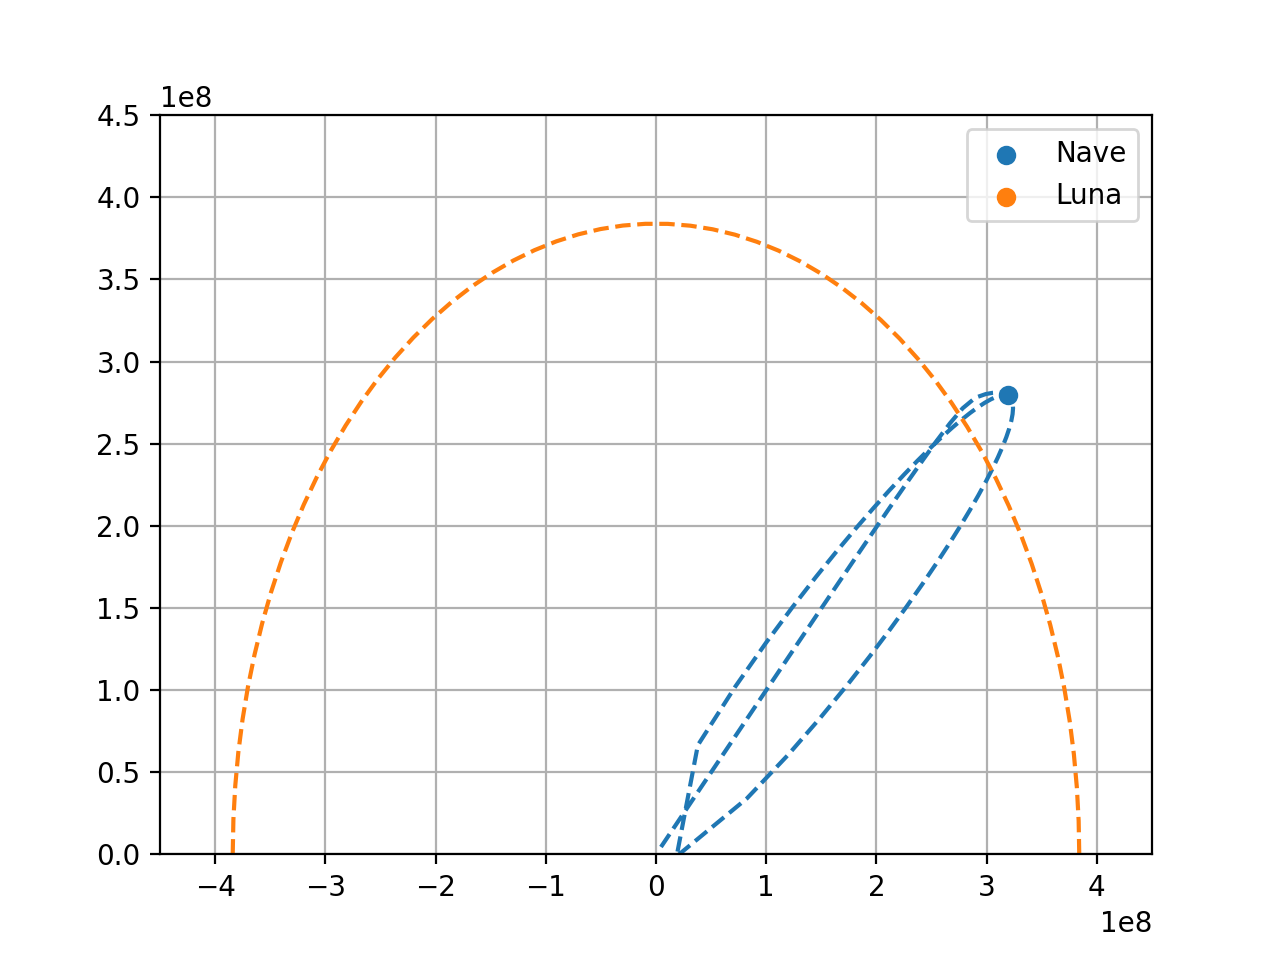

In [89]:
scale = 10000
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)

t = t[::scale]

def init():
    ax.clear()
    ax.set_xlim(-0.45e9, 0.45e9)
    ax.set_ylim(0, 0.45e9)

def update(i):
    init()
    ax.plot(navex[::scale][:i], navey[::scale][:i], linestyle="dashed")
    ax.scatter(navex[::scale][i], navey[::scale][i], label = "Nave")
    ax.plot(lunax[::scale][:i], lunay[::scale][:i], linestyle="dashed")
    ax.scatter(lunax[::scale][i], lunay[::scale][i], label = "Luna")
    ax.legend()
    ax.grid()

Animation = anim.FuncAnimation(fig, update, frames=len(t), init_func=init)
